# Problem Statement

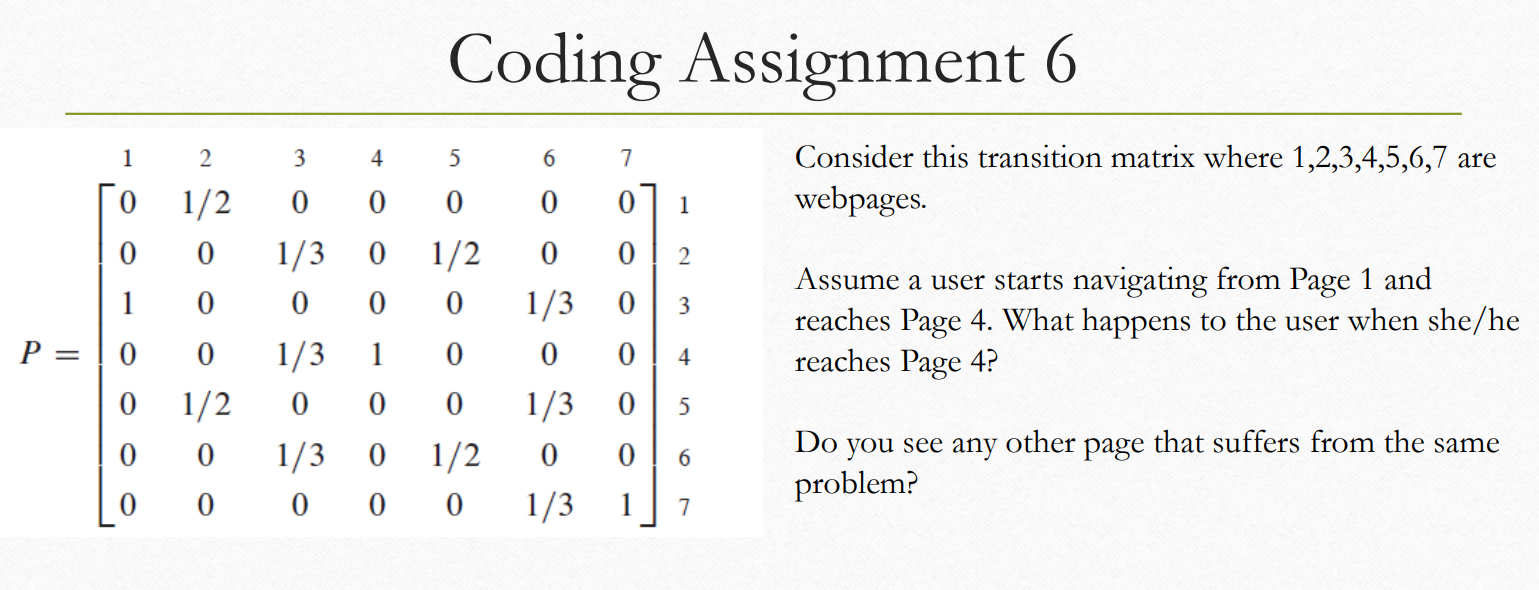

**Issue1:** Dangling nodes 

Dangling nodes in the web pages refer to pages that have no outgoing links or connections to other pages within a website. These nodes are isolated within the website's link structure, there are no paths for users to navigate away from them by following links. This may be caused due to removal of pages, broken links or orphaned contents. This may lead to dead ends, poor user experience, lowers indexing and ranking of the pages.

# Solution

**Step1:** Identify dangling nodes in the matrix

**Step2:** Adjust the transition matrix by changing columns(where dangling nodes are present) by value 1/rows of the matrix

In [128]:
import numpy as np

#define a function to identify dangling nodes
def identify_dangling_nodes(matrix):
    dangle_nodes=[]
    for i in range(len(matrix)):
        if matrix[i][i]==1:
            dangle_nodes.append(i)
    return dangle_nodes    

#define a function to adjust the transition matrix
def adjust_matrix(matrix, dangle_nodes):
    rows=len(matrix)
    cols=len(matrix[0])
    for i in range(rows):
        if i in dangle_nodes:
            for j in range(cols):
                matrix[j][i] =1/rows
    return matrix

In [129]:
#define the matrix
matrix=np.array([[0, 1/2, 0,  0, 0,   0,  0],
        [0, 0,  1/3, 0, 1/2, 0,  0],
        [1, 0,  0,   0, 0,  1/3, 0],
        [0, 0,  1/3, 1, 0,   0,  0],
        [0, 1/2, 0,  0, 0,  1/3, 0],
        [0, 0,  1/3, 0, 1/2, 0,  0],
        [0, 0,  0,   0, 0,  1/3, 1]])

n=identify_dangling_nodes(matrix)
print("Dangling nodes")
print(n)

A=adjust_matrix(matrix,n)
print("\nAdjusted matrix")
print(A)

Dangling nodes
[3, 6]

Adjusted matrix
[[0.     0.5    0.     0.1429 0.     0.     0.1429]
 [0.     0.     0.3333 0.1429 0.5    0.     0.1429]
 [1.     0.     0.     0.1429 0.     0.3333 0.1429]
 [0.     0.     0.3333 0.1429 0.     0.     0.1429]
 [0.     0.5    0.     0.1429 0.     0.3333 0.1429]
 [0.     0.     0.3333 0.1429 0.5    0.     0.1429]
 [0.     0.     0.     0.1429 0.     0.3333 0.1429]]


**Issue2:** Loops in the webpages

Loop occurs when the web pages link back to each other. Results in visiting the same pages in a cycle manner.

# Solution

**Step1**
Introduce Random Transition Probability (Y) where every element is 1/𝑛, ensuring equal probability of teleportation(1-P) to any page. Adjust the transition matrix (A) by combining it with Random Transition Probability.

**Step2**
Create a Google Matrix by the formula **G_matrix= Probability*A +(1-Probability)* Y**

**Step3:** Multiply google matrix and the vector (starting from page 1 moving to other pages) which is equal to probability vector

**Step4:** If the vector and the probability vector both are same, increase the count by 1

**Step5:** If both the vector and the probability 

In [146]:
def steady_state_vector(vector, google_matrix):
    n = 100
    count = 0
    vector = np.array(vector)  
    for i in range(n):
        probability_vector = np.round(np.dot(google_matrix, vector), 8)
        if np.array_equal(vector, probability_vector):
            count += 1
        else:
            count = 0
        if count == 10:
            print("Number of iterations:", i)
            break
        vector = probability_vector
    print(vector)
    print("\nRank of each page")
    for i in range(len(vector)):
        print(f"Page {i+1}: {vector[i]}")


In [147]:
#create a matrix where all the elements are 1/num.of rows
rows=len(A)
Y=1/rows/np.ones((rows,rows))
print("Y:\n",Y)
#create a google matrix
P=0.88
Z= P*A +(1-P)*Y 
print("Google Matrix:\n",Z)

Y:
 [[0.1429 0.1429 0.1429 0.1429 0.1429 0.1429 0.1429]
 [0.1429 0.1429 0.1429 0.1429 0.1429 0.1429 0.1429]
 [0.1429 0.1429 0.1429 0.1429 0.1429 0.1429 0.1429]
 [0.1429 0.1429 0.1429 0.1429 0.1429 0.1429 0.1429]
 [0.1429 0.1429 0.1429 0.1429 0.1429 0.1429 0.1429]
 [0.1429 0.1429 0.1429 0.1429 0.1429 0.1429 0.1429]
 [0.1429 0.1429 0.1429 0.1429 0.1429 0.1429 0.1429]]
Google Matrix:
 [[0.0171 0.4571 0.0171 0.1429 0.0171 0.0171 0.1429]
 [0.0171 0.0171 0.3105 0.1429 0.4571 0.0171 0.1429]
 [0.8971 0.0171 0.0171 0.1429 0.0171 0.3105 0.1429]
 [0.0171 0.0171 0.3105 0.1429 0.0171 0.0171 0.1429]
 [0.0171 0.4571 0.0171 0.1429 0.0171 0.3105 0.1429]
 [0.0171 0.0171 0.3105 0.1429 0.4571 0.0171 0.1429]
 [0.0171 0.0171 0.0171 0.1429 0.0171 0.3105 0.1429]]


In [148]:
X=[1, 0, 0, 0, 0, 0, 0]
steady_state_vector(X,Z)

Number of iterations: 32
[0.1154 0.1698 0.1921 0.0971 0.1652 0.1698 0.0905]

Rank of each page
Page 1: 0.11543726
Page 2: 0.16979099
Page 3: 0.19211937
Page 4: 0.09708424
Page 5: 0.16524262
Page 6: 0.16979099
Page 7: 0.09053458
